## Inicialização

Nesse primeireo bloco temos declação de variáveis de importações.

In [5]:
import pandas as pd
from bs4 import BeautifulSoup


f_name='data/pbe_veicular_2016.html'
output_file='data/pbe_veicular_2016.csv'

def valves_transf(v):
    if v != None:
        new_v =  v.lower().replace("v", "")
        try:
            new_v = int(new_v)
        except ValueError:
            pass
        return new_v
    return v

def float_transf(v):
    if v != None:        
        try:
            new_v = float(v.replace(",", "."))
        except ValueError:
            new_v = v
        return new_v
    return v


def int_transf(v):
    if v != None:        
        try:
            new_v = int(v)
        except ValueError:
            new_v = v
        return new_v
    return v

col_names = {
    'category': {'id': 0}, 'brand': {'id': 1}, 'model': {'id': 2}, 'displacement': {'id': 3, 'split': 0, 'sep': '-', 'transform': float_transf}, 
    'valves': {'id': 3, 'split': 1, 'sep': '-', 'transform': valves_transf}, 'transmission': {'id': 5, 'split': 0, 'sep': '-'}, 'gears': {'id': 5, 'split': 1, 'sep': '-', 'transform': int_transf}, 'air_conditioner': {'id': 6}, 'steering': {'id': 7},
    'fuel_type': {'id': 9}, 'nmhc_emission': {'id': 10, 'transform': float_transf}, 'co_emission': {'id': 11, 'transform': float_transf}, 'nox_emission': {'id': 12}, 'co2_emission_eta': {'id': 15, 'transform': float_transf}, 
    'co2_emission_gas': {'id': 17, 'transform': float_transf}, 'consumption_eta_city': {'id': 18, 'transform': float_transf}, 'consumption_eta_highway': {'id': 19}, 'consumption_gas_city': {'id': 21, 'transform': float_transf}, 'consumption_gas_highway': {'id': 22, 'transform': float_transf},
    'relative_label': {'id': 31}, 'absolute_label': {'id': 32}
}
DATA_TABLE = 'TabelaConsumowrapper'


In [6]:
''' Obtém o nome da variável de uma das colunas da tabela.
'''
def get_col_name(row, col):
    return "rptLinhas_rptColunaDinamica_%d_td_dados_%d" % (row, col)



Carregamendo dos dados do HTML

In [7]:
soup = BeautifulSoup(open(f_name, 'r'), 'lxml')
table = soup.find(id=DATA_TABLE)


In [64]:
''' Gera as linhas da tabela contina no HTML
'''
def gen_rows():
    read_rows=True
    row_count=0

    while(read_rows):
        row = {k: None for k in col_names.keys()}
        for k, v in col_names.items():
            html_col_id = get_col_name(row_count, v['id'])
            html_elem = table.find(id = html_col_id)
               
            if html_elem != None:
                html_value = html_elem.text.strip()                
                if 'split' in v:
                    html_values = html_value.split(v['sep'])

                    # The field is empty or sep found nothing
                    if len(html_values) > v['split']:
                        html_value = html_values[v['split']]
                        
                # empty value check
                row[k] = "NA" if html_value == "/" or html_value == "\\" else html_value.lower()
                # value transform
                if row[k] != "NA" and "transform" in v:
                    row[k] = v["transform"](row[k])

        # stop to search when reaches an empty row
        if not row:
            read_rows=False
            break
        
        row_count+=1
        if row_count % 100 == 0:
            print(row_count)
            #return
            
        yield row


Carrega as linha no *DataFrame*

In [ ]:

df = pd.DataFrame(gen_rows())

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


### Impressão
Imprime as 10 primeiras linhas.


In [14]:
from IPython.display import display, HTML

HTML(df[:9].to_html())

### DataFrame to File

In [15]:
df.to_csv(output_file)

### Manipulação dos dados

Carro mais econômico

In [ ]:
# category == compacto
# fuel_type == f
# displacement == 1.6
# consumption_gas_city < avg

consumption_gas_city_mean = df.describe()['consumption_gas_city']['mean']
query = 'category == "compacto" and fuel_type == "f" and displacement == 1.6 and consumption_gas_city < %f' % consumption_gas_city_mean
df.query(query)

Você deverá calcular a média e o desvio padrão dessa proporção para carros compactos com motor flex 1.6, tanto para cidade quanto para estrada


In [ ]:
query = 'fuel_type == f and displacement == 1.6'
df.query(query)

### Gráficos

#### Consumo

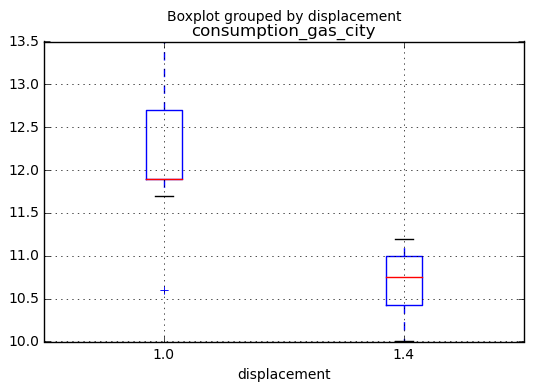

In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

query = 'category == "compacto"'
data = df.query(query)

data.boxplot(column='consumption_gas_city', by='displacement')


#### Ar Condicionado

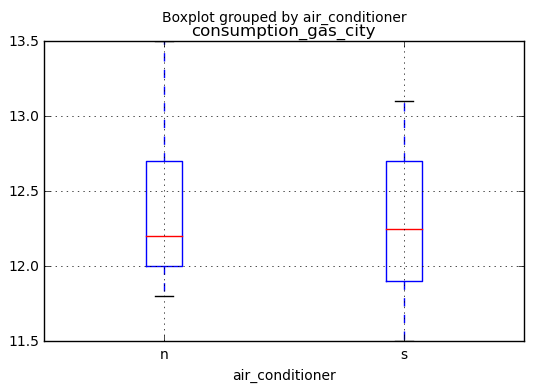

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

#query = 'air_conditioner == "s"'
query = 'brand == "fiat" and transmission == "m" and displacement==1.0'

data = df.query(query)

data.boxplot(column='consumption_gas_city', by='air_conditioner')